In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import numpy as np
import matplotlib.pyplot as plt
import re
import operator

In [2]:
titanic = pandas.read_csv('train.csv')

In [3]:
print titanic.head(5)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print titanic.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [6]:
print(titanic['Sex'].unique())

['male' 'female']


In [7]:
titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0
titanic.loc[titanic['Sex'] == 'female', 'Sex'] = 1

In [9]:
print titanic['Embarked'].unique()

['S' 'C' 'Q' nan]


In [12]:
titanic = titanic.join(pd.get_dummies(titanic.Embarked, prefix='Embarked'))

In [14]:
titanic = titanic.drop(['Embarked'], axis=1)

In [18]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1,0,0


In [26]:
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
alg = LinearRegression()
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
predictions = []
for train, test in kf:
    train_predictors = (titanic[predictors].iloc[train, :])
    train_target = titanic['Survived'].iloc[train]
    alg.fit(train_predictors, train_target)
    test_predictions = alg.predict(titanic[predictors].iloc[test, :])
    predictions.append(test_predictions)
predictions = np.concatenate(predictions, axis=0)

In [35]:
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0
accuracy = sum(map(lambda x, y : x == y, predictions, titanic['Survived'])) / (len(titanic['Survived']) * 1.0)
print accuracy

0.784511784512


In [36]:
alg = LogisticRegression(random_state=1)
scores = cross_val_score(alg, titanic[predictors], titanic['Survived'], cv=3)
print scores.mean()

0.79012345679


In [37]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

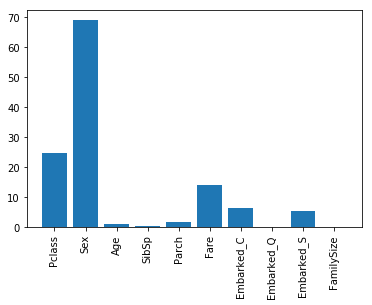

In [47]:
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize']

selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic['Survived'])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [56]:
alg = GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3)
predictors = ['Pclass', 'Sex', 'Age', 'Fare']

kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
predictions = []

for train, test in kf:
    train_target = titanic['Survived'].iloc[train]
    test_predictions = []
    alg.fit(titanic[predictors].iloc[train, :], train_target)
    test_predictions = alg.predict_proba(titanic[predictors].iloc[test, :].astype(float))[:, 1]
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

predictions = np.concatenate(predictions, axis=0)
accuracy = sum(map(lambda x, y : x == y, predictions, titanic['Survived'])) / (len(titanic['Survived']) * 1.0)
print accuracy

0.817059483726
